In [1]:
%matplotlib inline
# Enabling reloading extension to use external python files
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import os
from datetime import date, datetime,timedelta
import math
import columns
import datasets
import seasons
import directory_utils

In [3]:
# Setup matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

In [4]:
data_frame = pd.read_csv(datasets.DAILY_ANALYSIS_DATA_SET_111_PATH, encoding=datasets.DEFAULT_CSV_ENCODING)

In [5]:
data_frame.shape

(7206, 20)

In [6]:
data_frame.head()

,Data,Ano,Mês,Dia,Dia Juliano,Estação Metereológica do Ano,Temperatura do Ar Média (°C),Temperatura do Ar Máxima (°C),Temperatura do Ar Mínima (°C),Variação da Temperatura do Ar (°C),Percentil Temperatura Max (15 dias),Percentil Temperatura Min (15 dias),Umidade relativa Média (%),Umidade relativa Máxima (%),Umidade relativa Mínima (%),Variação da Umidade relativa (%),Pressão (hPa),Pressão Máxima (hPa),Pressão Mínima (hPa),Variação da Pressão (hPa)
0,1997-01-01 00:00:00+00:00,1997,1,1,1,Verão,22.875903,29.39,18.53,10.86,31.974,19.234,80.237222,98.1,58.77,39.33,942.916667,945.0,940.0,5.0
1,1997-01-02 00:00:00+00:00,1997,1,2,2,Verão,21.545625,25.93,19.21,6.72,31.866,19.226,79.303194,88.7,66.41,22.29,943.861111,947.0,942.0,5.0
2,1997-01-03 00:00:00+00:00,1997,1,3,3,Verão,20.179444,25.17,17.88,7.29,31.758,19.218,82.070000,95.0,67.79,27.21,945.409722,947.0,944.0,3.0
3,1997-01-04 00:00:00+00:00,1997,1,4,4,Verão,22.125833,29.21,17.85,11.36,31.650,19.210,83.748333,100.0,56.78,43.22,943.194444,946.0,941.0,5.0
4,1997-01-05 00:00:00+00:00,1997,1,5,5,Verão,23.178958,30.46,18.06,12.40,31.583,19.282,84.473542,100.0,57.30,42.70,942.729167,945.0,940.0,5.0


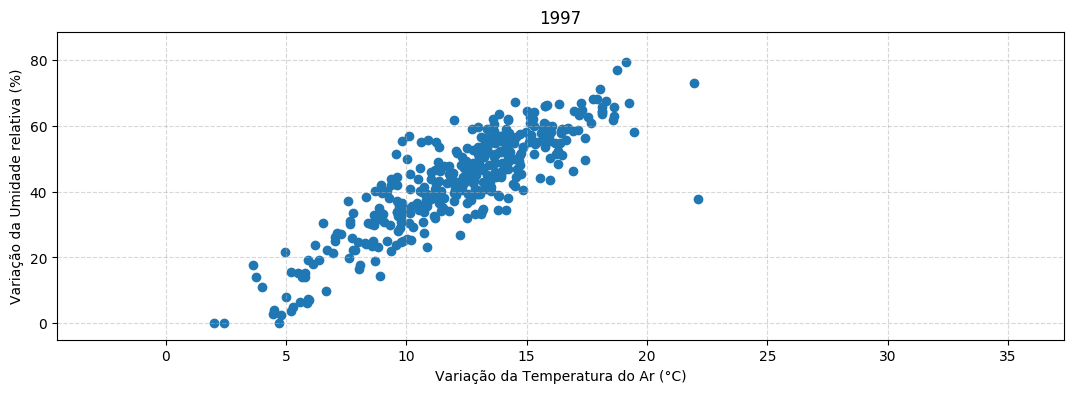

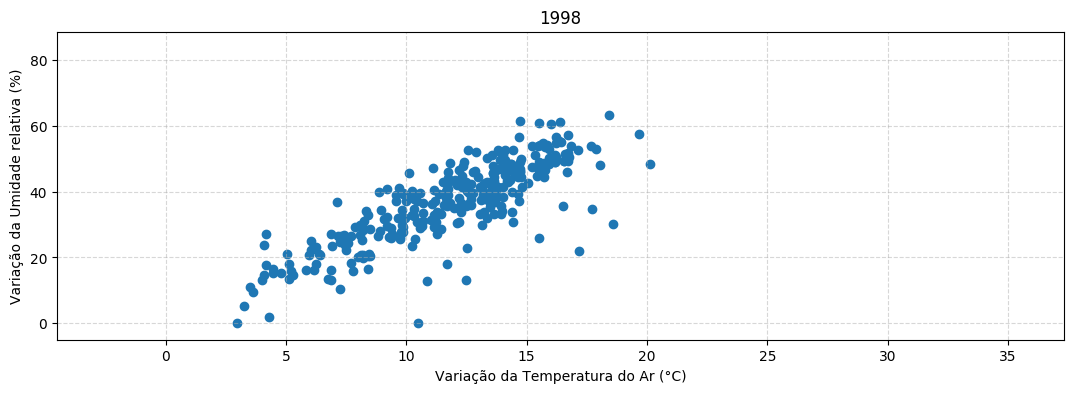

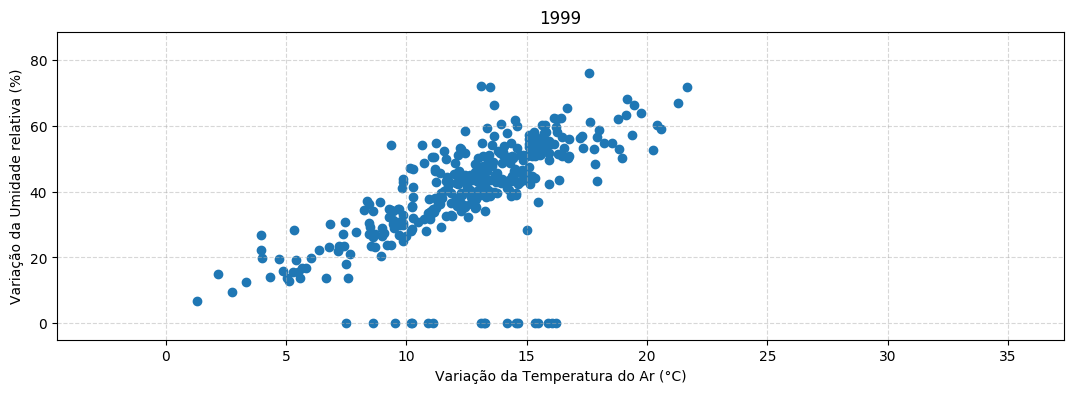

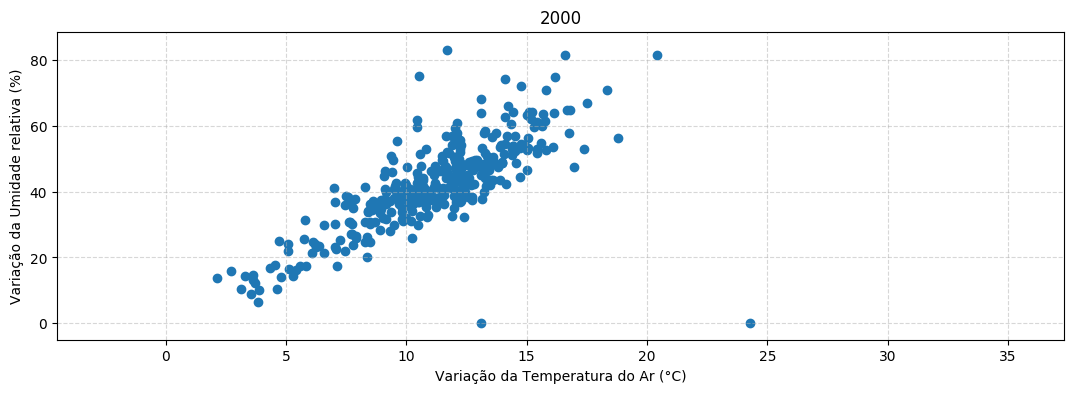

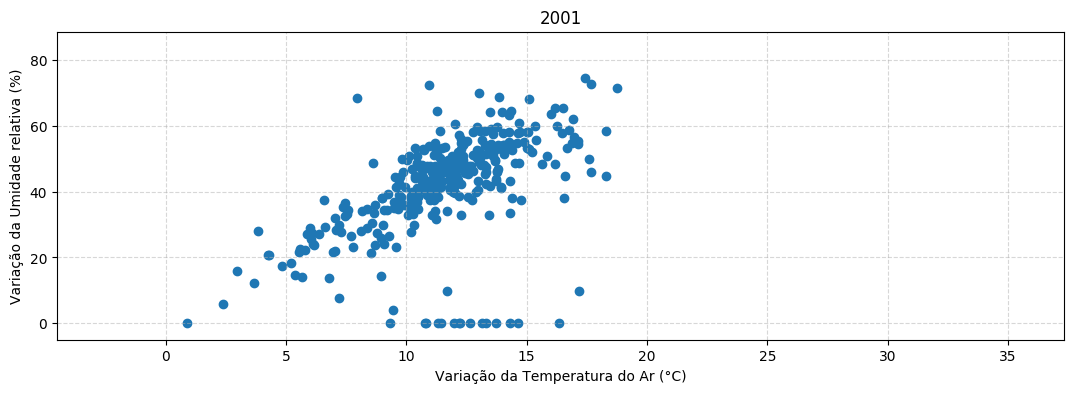

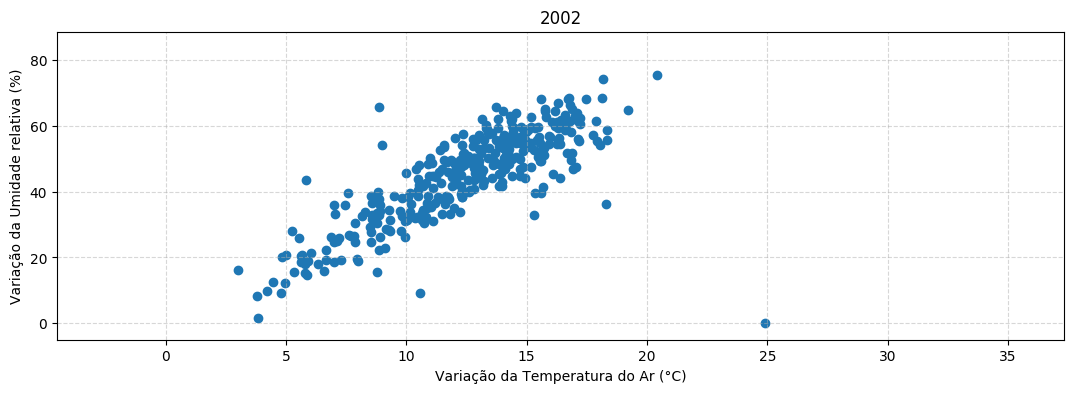

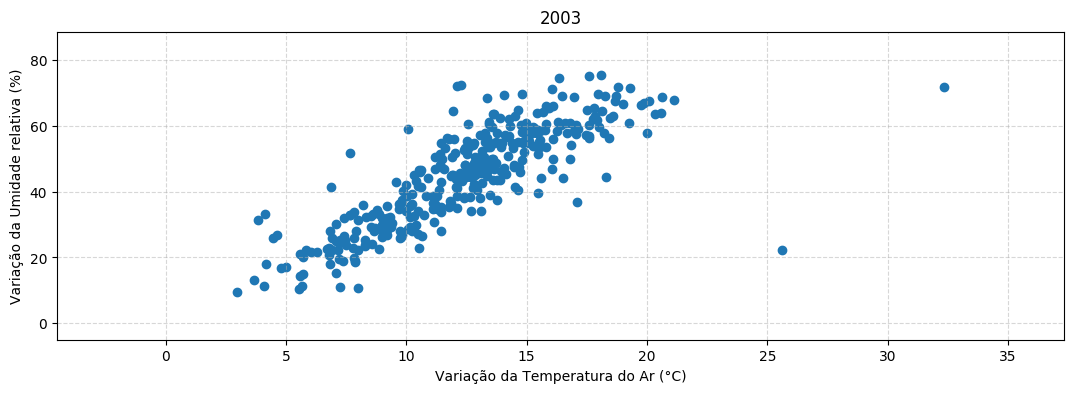

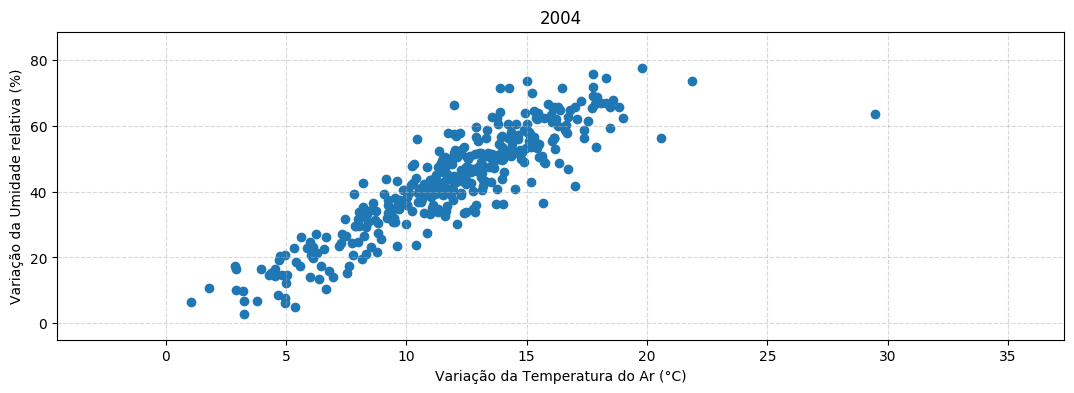

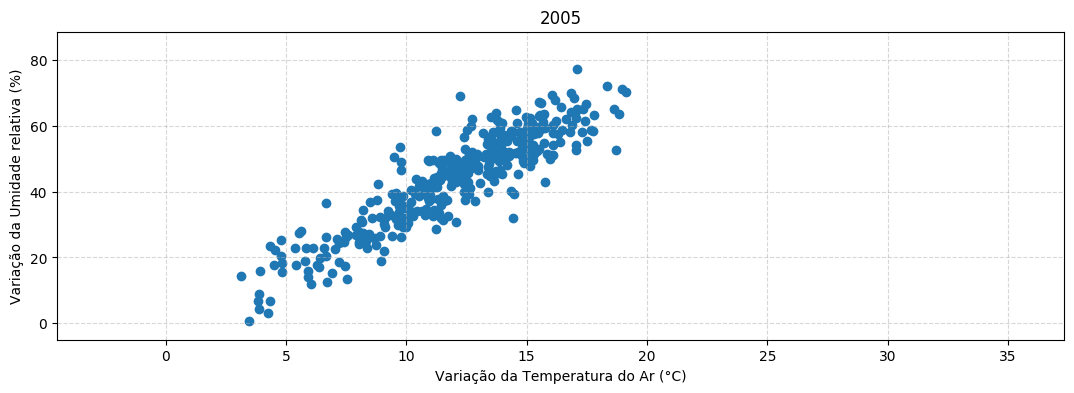

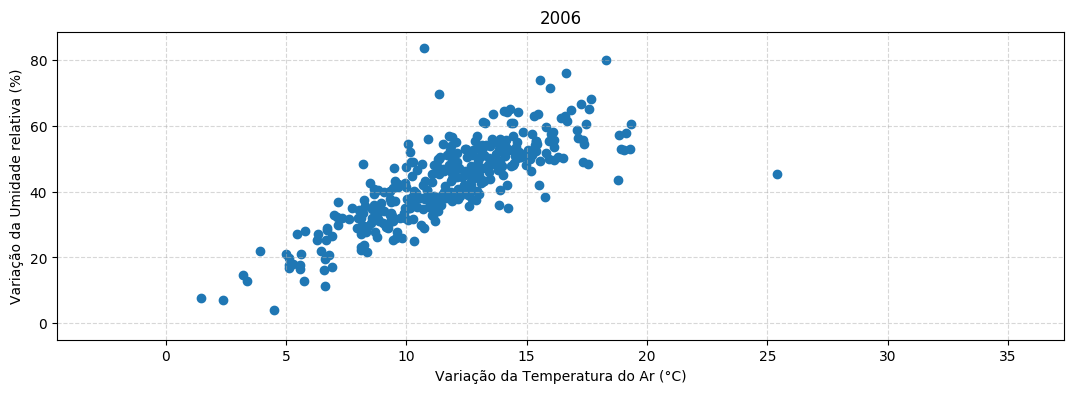

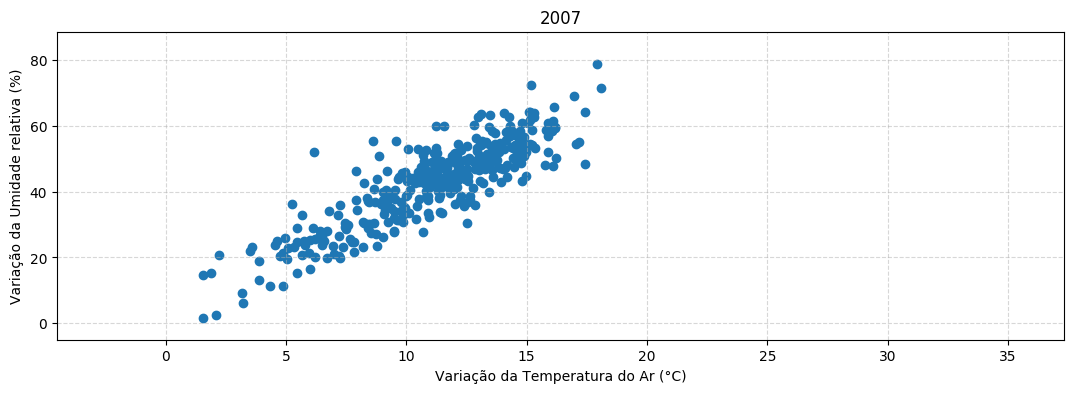

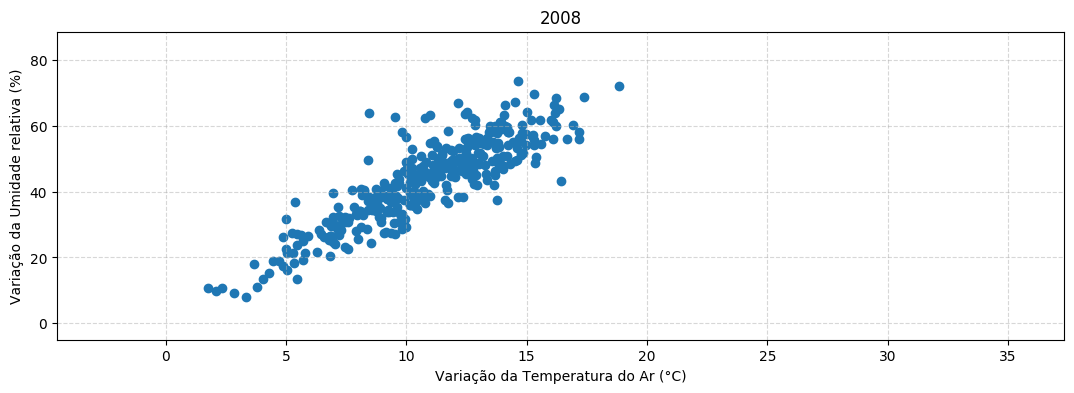

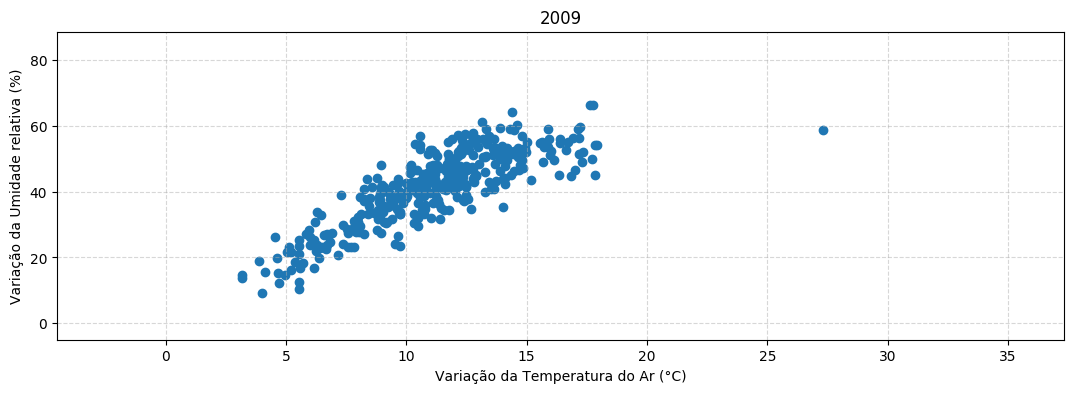

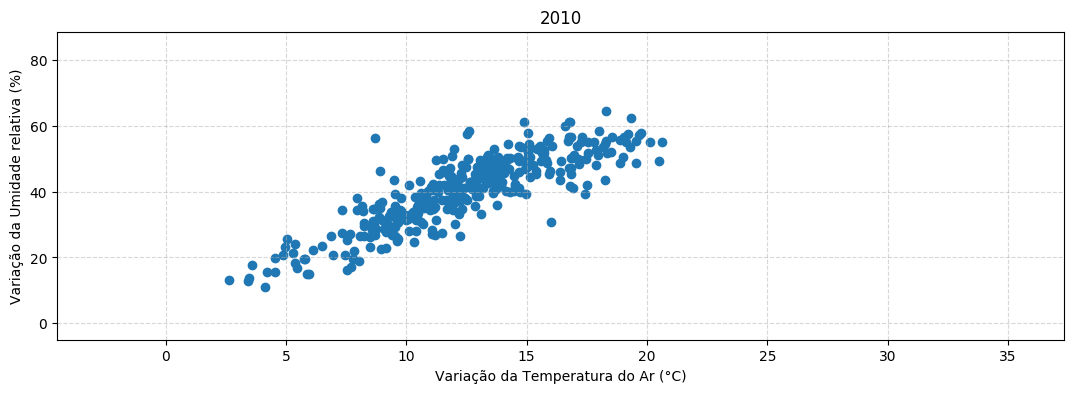

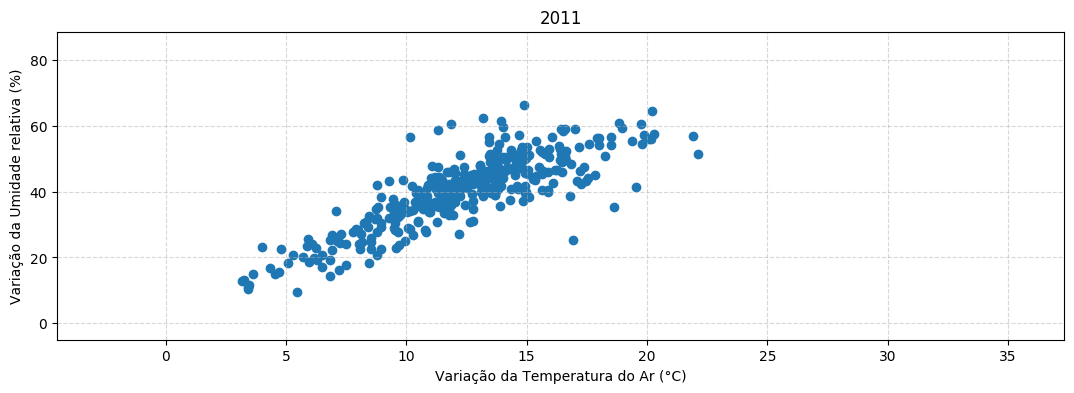

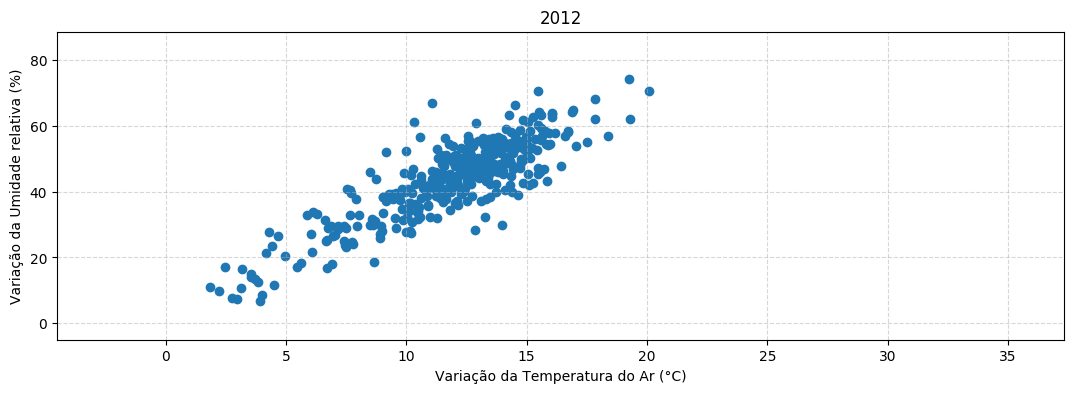

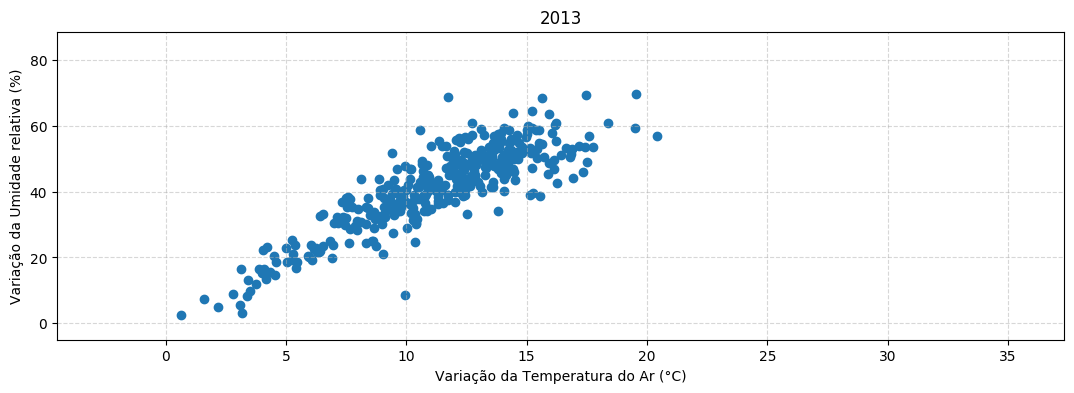

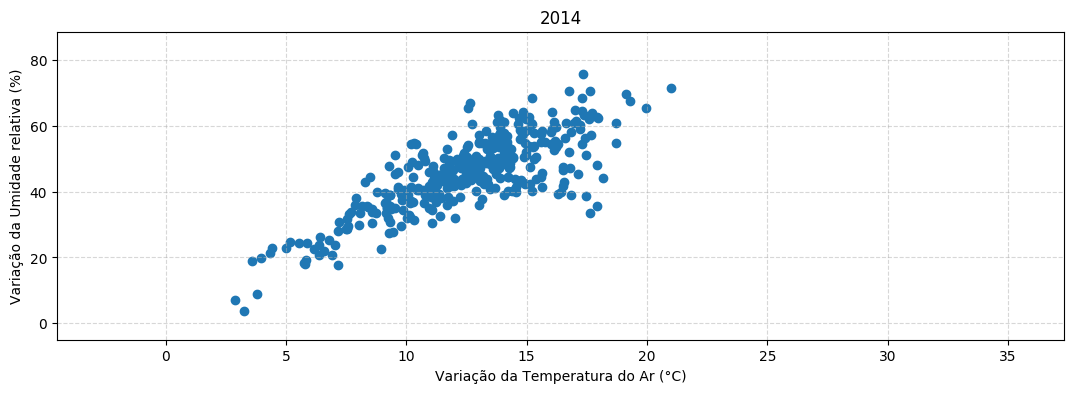

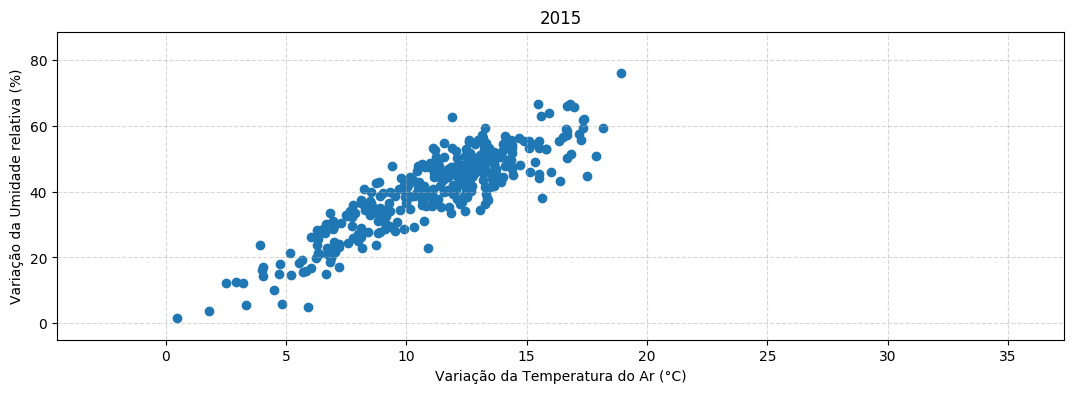

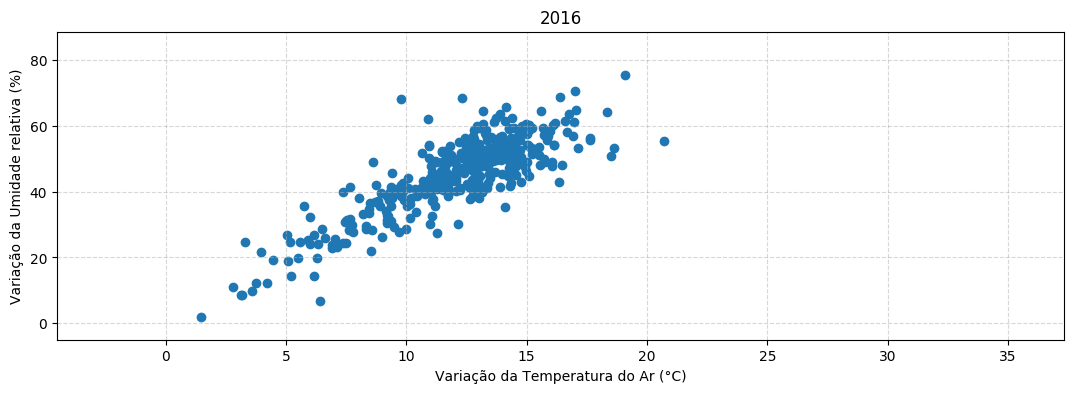

In [10]:
min_x_value = data_frame[columns.VARIATION_TEMP].min() - 5
max_x_value = data_frame[columns.VARIATION_TEMP].max() + 5

min_y_value = data_frame[columns.VARIATION_HUMIDITY].min() - 5
max_y_value = data_frame[columns.VARIATION_HUMIDITY].max() + 5

for i in data_frame[columns.YEAR].unique():
    data_2plot = data_frame[(data_frame[columns.YEAR] == i)]

    plt.figure(figsize=(13,4))
    plt.title(str(i))    
    plt.scatter(data_2plot[columns.VARIATION_TEMP], data_2plot[columns.VARIATION_HUMIDITY])
    plt.xlabel(columns.VARIATION_TEMP)
    plt.ylabel(columns.VARIATION_HUMIDITY)
    plt.grid(True, linestyle='--', alpha = 0.5)
    plt.xlim(min_x_value, max_x_value)
    plt.ylim(min_y_value, max_y_value)
    plt.show()

In [12]:
data_frame[[columns.VARIATION_TEMP,columns.VARIATION_HUMIDITY]].corr()

,Variação da Temperatura do Ar (°C),Variação da Umidade relativa (%)
Variação da Temperatura do Ar (°C),1.000000,0.797725
Variação da Umidade relativa (%),0.797725,1.000000
